Analysis of weather variable data at station 'ACME'

In [1]:
# importing necessary modules
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# total column-integrated condensate over the entire atmosphere at station 'ACME: tc'
tc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Total_condensate\\tc_station.csv", header=None)
# total cloud cover over the entire depth of the atmosphere at station 'ACME: tcc'
tcc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Total_cloud_cover\\tcc_station.csv", header=None)
# specific humidity at 2 m above ground 'ACME: h'
h = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Sp_humidity\\h_station.csv", header=None)
# precipitable water over the entire depth of the atmosphere at station 'ACME: pw'
pw = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Precip_water\\pw_station.csv", header=None)
# 3-Hour accumulated precipitation at the surface at station 'ACME': precip
precip = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Precipitation\\precip_station.csv", header=None)
# air pressure at mean sea level at 'ACME': pr
pr = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Pressure\\pr_station.csv", header=None)

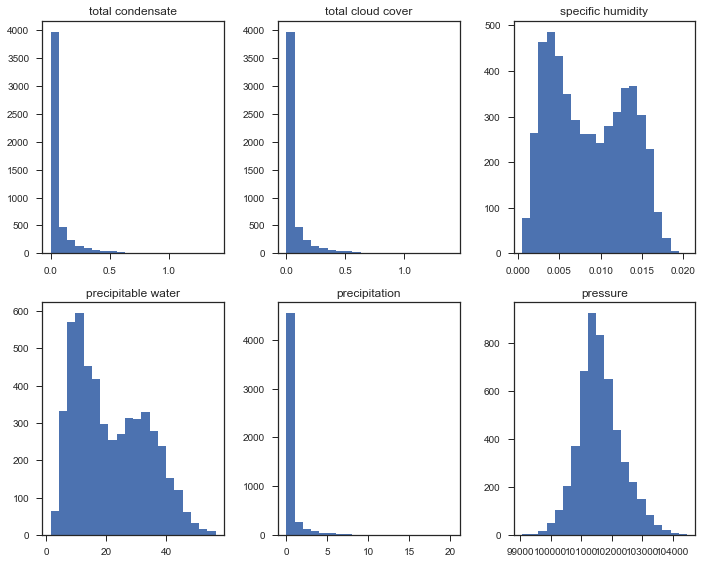

In [120]:
# Histograms of all the weather variables to see frequency distribution from 14 years of data

fig, axes = plt.subplots(nrows=2, ncols=3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
n_bins = 20
ax0.hist(tc[0], n_bins, histtype='bar', label='tc')
ax0.set_title('total condensate')

ax1.hist(tcc[0], n_bins, histtype='bar', label='tcc')
ax1.set_title('total cloud cover')

ax2.hist(h[0], n_bins, histtype='bar', label='h')
ax2.set_title('specific humidity')

ax3.hist(pw[0], n_bins, histtype='bar', label='pw')
ax3.set_title('precipitable water')

ax4.hist(precip[0], n_bins, histtype='bar', label='precip')
ax4.set_title('precipitation')

ax5.hist(pr[0], n_bins, histtype='bar', label='pr')
ax5.set_title('pressure')


fig.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = [10,8]


Comment: For total condensate, cloud cover and precipitation, most data are concentrated near first bin. Specific humidity and precipitable water has bimodal distribution with a second peak (relatively smaller) towards the tail. Pressure data is more normally distributed.

In [3]:
# Summary statistics of temperature data
print('Summary statistics of weather variable data:')
tc_des = tc.describe()
tcc_des = tcc.describe()
h_des = h.describe()
pw_des = pw.describe()
precip_des = precip.describe()
pr_des = pr.describe()
var_stat = pd.concat([tc_des, tcc_des, h_des, pw_des, precip_des, pr_des], axis=1)
var_stat.columns = ['tc', 'tcc', 'h', 'pw', 'precip', 'pr']
print(var_stat)


Summary statistics of weather variable data:
                tc          tcc            h           pw       precip  \
count  5113.000000  5113.000000  5113.000000  5113.000000  5113.000000   
mean      0.061296     0.060980     0.008635    21.608479     0.407633   
std       0.127186     0.127305     0.004573    11.959801     1.209306   
min       0.000062     0.000000     0.000497     1.480269     0.000000   
25%       0.001302     0.000674     0.004452    11.089578     0.000000   
50%       0.009604     0.009231     0.008235    19.110287     0.001498   
75%       0.058732     0.058725     0.012774    31.399079     0.165817   
max       1.398001     1.398177     0.020450    56.602561    20.104204   

                  pr  
count    5113.000000  
mean   101627.685348  
std       715.369578  
min     99056.498830  
25%    101165.580317  
50%    101556.280456  
75%    102034.126807  
max    104476.035765  


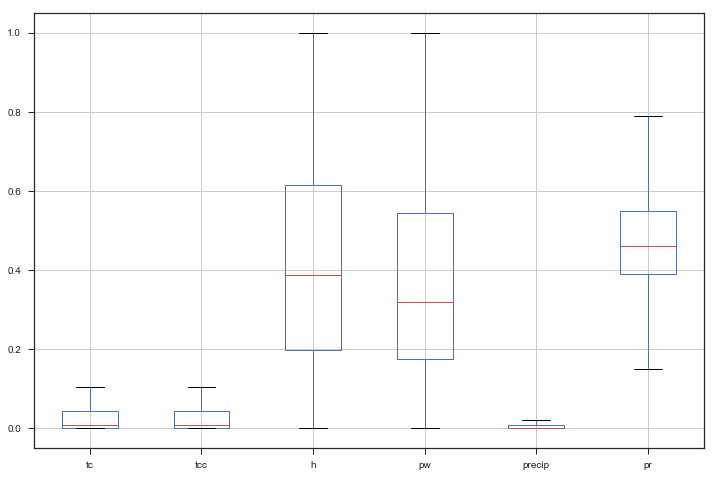

In [15]:
#normalize/scaling the values for making boxplots

var = pd.concat([tc, tcc, h, pw, precip, pr], axis=1)

x = var.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
var_sc = pd.DataFrame(x_scaled)
var_sc.columns = ['tc', 'tcc', 'h', 'pw', 'precip', 'pr']
var_sc_bxplt = var_sc.boxplot(column=['tc', 'tcc', 'h', 'pw', 'precip', 'pr' ], figsize=(12,8))


Comment: For total condensate, cloud cover and precipitation the distribution is right skewed. More than 50% is concentrated near minimum value. Specific humidity and precipitable water both are bimodal distribution indicating large number of humid and dry days (not necessarily resulting rains). The pressure distribution is more symmetrical.

              tc       tcc         h        pw    precip        pr
tc      1.000000  0.999995  0.036771  0.200444  0.755274 -0.039275
tcc     0.999995  1.000000  0.036724  0.200447  0.755142 -0.039151
h       0.036771  0.036724  1.000000  0.919065  0.197026 -0.533561
pw      0.200444  0.200447  0.919065  1.000000  0.313139 -0.412044
precip  0.755274  0.755142  0.197026  0.313139  1.000000 -0.122777
pr     -0.039275 -0.039151 -0.533561 -0.412044 -0.122777  1.000000


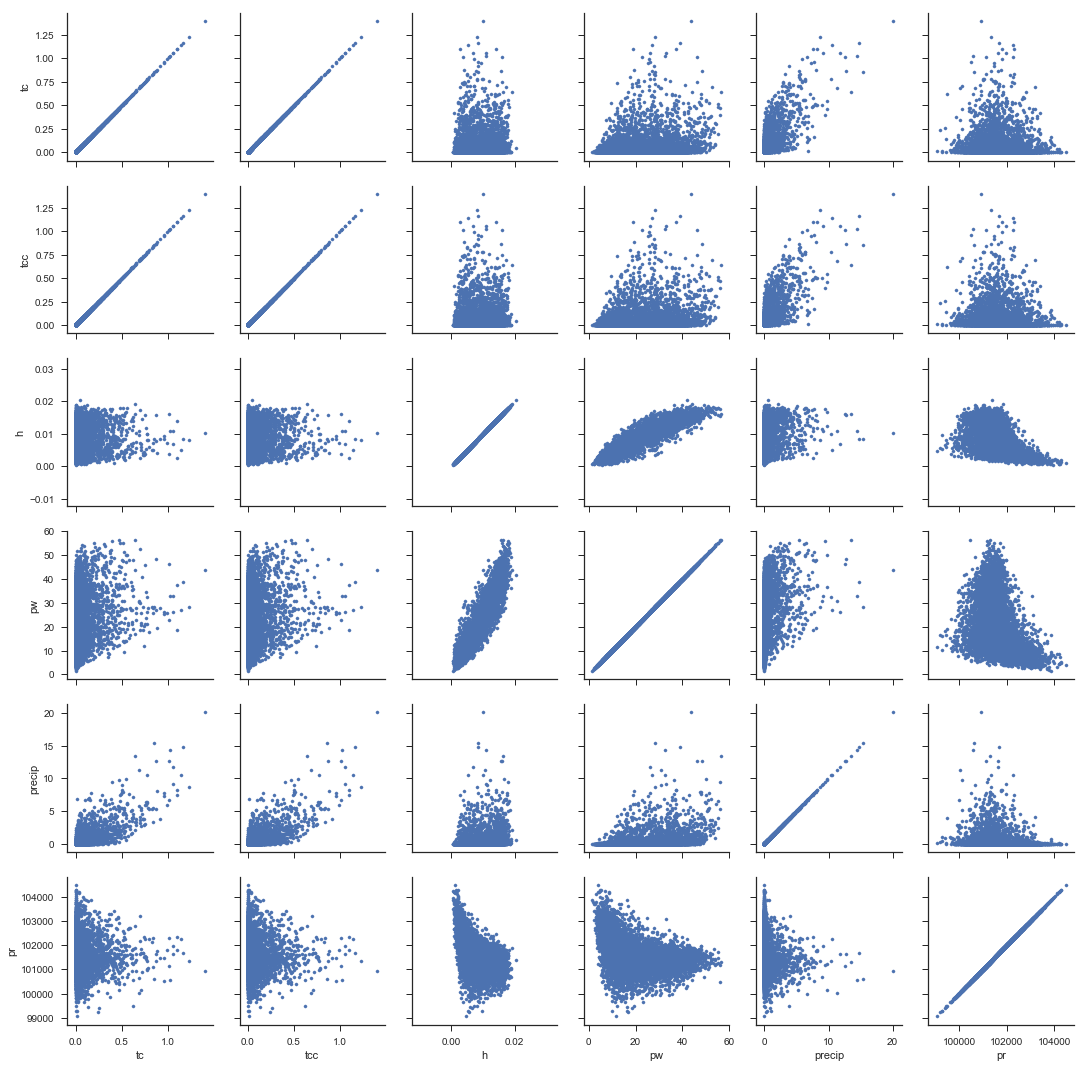

In [9]:
# finding correlation among the variables
#var = pd.concat([tc, tcc, h, pw, precip, pr], axis=1)
var.columns = ['tc', 'tcc', 'h', 'pw', 'precip', 'pr']

# correlation coefficients
var_corr = var.corr()
print(var_corr)

# visualizing correlation cofficient
sns.set(style="ticks")
var_g = sns.PairGrid(var)
var_g.map(plt.scatter, s=10)


Comment: Linear correlation between total condensate (tc) and total cloud cover (tcc) is remarkably high. we can get rid of one variable here. Also the precipitable water (pw) and specific humidity are strongly correlated as higher specific humidity indicates more precipitable water.

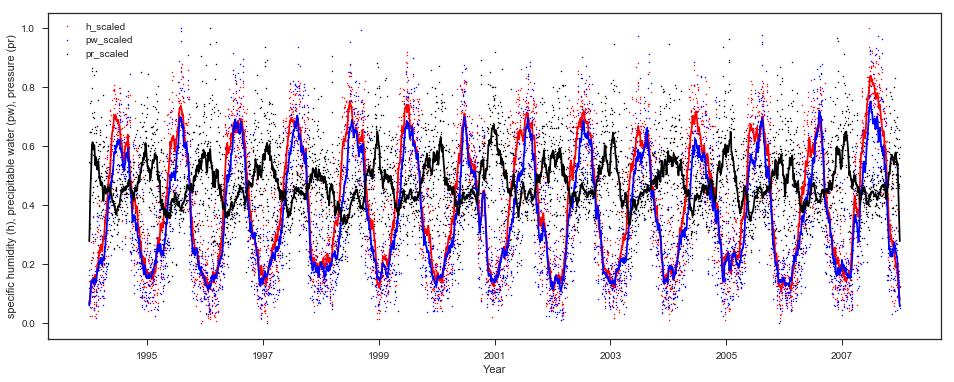

In [45]:
# time series of weater variables: any seasonality??
dates = np.arange(np.datetime64('1994-01-01'), np.datetime64('2008-01-01'))
dates[:365]

# scaling the data to show them in same plot

x = var.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
var_sc = pd.DataFrame(x_scaled)
var_sc.columns = ['tc', 'tcc', 'h', 'pw', 'precip', 'pr']
#print(var_sc)

# esttimating the noving average
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

x = dates
y = var_sc['h']
plt.scatter(x, y, s=5, marker='.', color='red', label='h_scaled')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='red')

y = var_sc['pw']
plt.scatter(x, y, s=5, marker='.', color='blue', label='pw_scaled')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='blue')

y = var_sc['pr']
plt.scatter(x, y, s=5, marker='.', color='black', label='pr_scaled')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='black')

plt.xlabel('Year')
plt.ylabel('specific humidity (h), precipitable water (pw), pressure (pr)')
plt.legend(loc='upper left')
plt.show()
plt.rcParams["figure.figsize"] = [16,6]
# only 'h', 'pw', and 'pr' have seasonality



Comment: during summer specific humidity (h) and precipitable water (pw) high.
During winter pressure (pr) is high. (AS expected)

In [22]:
# for all weather variables
file = [tc, tcc, h, pw, precip, pr]
avg_var = pd.DataFrame()
annual_var = pd.DataFrame()
for j in range(6):
    v = file[j]
    #Averaging  over each day in the year: avg_rf
    # Annual average : annual_rf
    # days in year from 1994 to 2007: leap year- 1996, 2000, 2004
    d = [365, 730, 1096, 1461, 1826, 2191, 2557, 2922, 3287, 3652, 4018, 4383, 4748, 5113]

    yr = v[:365]

    for i in range(2007 - 1994):
        #print(d[i], d[i+1])
        yr1 = v[d[i]:d[i+1]]
        yr1.reset_index(inplace=True, drop=True)
        yr = pd.concat([yr, yr1], axis=1)
    a = list(range(1994, 2008))
    yr = yr[:365]
    yr.columns = a

    avg_yr = yr.mean(axis=1)
    annual_avg = yr.mean(axis=0)
    #print(type(avg_yr))
    avg_var = pd.concat([avg_var, avg_yr], axis=1)
    annual_var = pd.concat([annual_var, annual_avg], axis=1)
avg_var.columns = ['tc', 'tcc', 'h', 'pw', 'precip', 'pr']
annual_var.columns = avg_var.columns


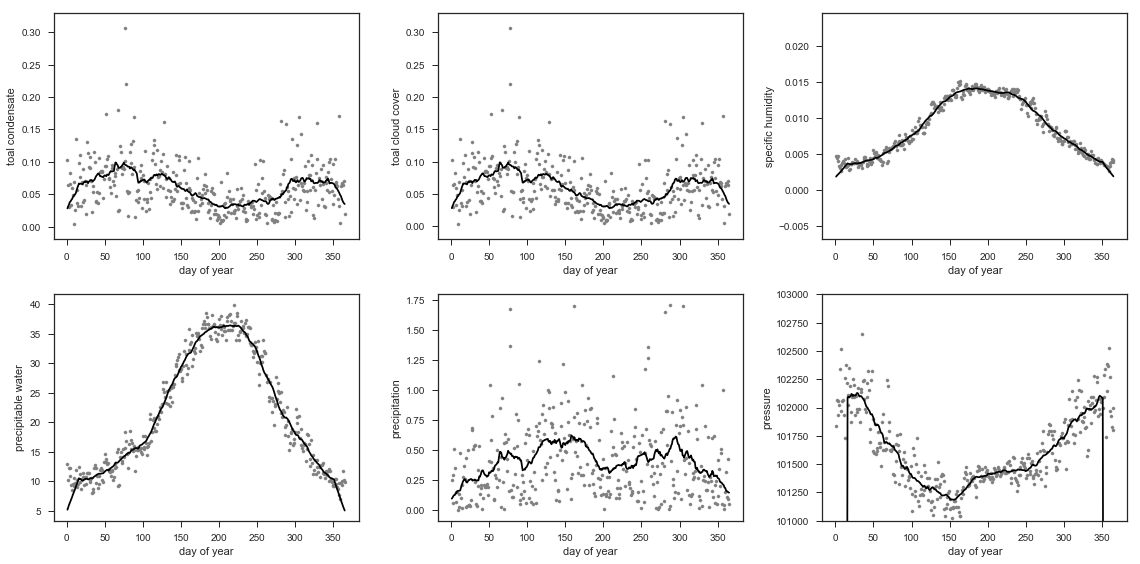

In [66]:
# Any seasonality in the variables?
days = list(range(1, 366))

fig, axes = plt.subplots(nrows=2, ncols=3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
x = days
y = avg_var['tc']
ax0.scatter(x, y, s=10, marker='o', color='gray', label='total condensate')
y_av = movingaverage(y, 30)
ax0.plot(x, y_av, color='black')
#ax0.legend(loc='upper center')
ax0.set_xlabel('day of year')
ax0.set_ylabel('toal condensate')

y = avg_var['tcc']
ax1.scatter(x, y, s=10, marker='o', color='gray', label='total cloud cover')
y_av = movingaverage(y, 30)
ax1.plot(x, y_av, color='black')
#ax1.legend(loc='upper center')
ax1.set_xlabel('day of year')
ax1.set_ylabel('toal cloud cover')

y = avg_var['h']
ax2.scatter(x, y, s=10, marker='o', color='gray', label='specific humidity')
y_av = movingaverage(y, 30)
ax2.plot(x, y_av, color='black')
#ax2.legend(loc='upper center')
ax2.set_xlabel('day of year')
ax2.set_ylabel('specific humidity')


y = avg_var['pw']
ax3.scatter(x, y, s=10, marker='o', color='gray', label='precipitable water')
y_av = movingaverage(y, 30)
ax3.plot(x, y_av, color='black')
#ax3.legend(loc='upper center')
ax3.set_xlabel('day of year')
ax3.set_ylabel('precipitable water')

y = avg_var['precip']
ax4.scatter(x, y, s=10, marker='o', color='gray', label='precipitation')
y_av = movingaverage(y, 30)
ax4.plot(x, y_av, color='black')
#ax4.legend(loc='upper center')
ax4.set_xlabel('day of year')
ax4.set_ylabel('precipitation')

y = avg_var['pr']
ax5.scatter(x, y, s=10, marker='o', color='gray', label='pressure')
y_av = movingaverage(y, 30)
ax5.plot(x, y_av, color='black')
ax5.set_ylim(101000, 103000)
#ax5.legend(loc='upper center')
ax5.set_xlabel('day of year')
ax5.set_ylabel('pressure')

fig.tight_layout()
plt.rcParams["figure.figsize"] = [16,8]
plt.show()

Comment: Seasonality is very much evident in specific humidity, precipitable water and pressure. Some seasonal characteristics are clear in total condensate and total cloud cover as well. 

# Any trend in annual average values?? Not apperant from the plot
year = list(range(1994, 2008))

fig, axes = plt.subplots(nrows=2, ncols=3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax0.scatter(year, annual_var['tc'], label='total condensate')
ax0.legend(loc='upper left')

ax1.scatter(year, annual_var['tcc'], label='total cloud cover')
ax1.legend(loc='upper left')

ax2.scatter(year, annual_var['h'], label='specific humidity')
ax2.legend(loc='upper left')

ax3.scatter(year, annual_var['pw'], label='precipitable water')
ax3.legend(loc='upper left')

ax4.scatter(year, annual_var['precip'], label='precipitation')
ax4.legend(loc='upper left')

ax5.scatter(year, annual_var['pr'], label='pressure')
ax5.legend(loc='upper left')


fig.tight_layout()
plt.rcParams["figure.figsize"] = [16, 8]
plt.xlabel('year')
plt.show()

Coment: No as such long term trend in any of these variables is evident